## Technical Exercise for Data Scientist Candidates

For this exercise, you will be working with beer data which can be downloaded from here 
https://drive.google.com/open?id=1e-kyoB97a5tnE7X4T4Es4FHi4g6Trefq
 
Unzip the file and you should see a CSV file, called “BeerDataScienceProject.csv”

The columns are
beer_ABV	beer_beerId	beer_brewerId	beer_name	beer_style	review_appearance	review_palette	review_overall	review_taste	review_profileName	review_aroma	review_text	review_time


You may use any one or more among the following open source programming language(s) (Python, R, C++, Java, Scala, Julia, etc.) if you like to do so (no “SQL” Based Code). You are welcome to use any other open source framework, packages, and technologies. Please provide your answers below the questions. 

When you submit your answers, please provide a link to your code in public repository like github with instructions on how to run it to reproduce your results.

Include few slides to summarize your findings and to convince the audience.     

Answer as many questions as possible.
 
Questions: 

1.	Rank top 3 Breweries which produce the strongest beers?
2.	Which year did beers enjoy the highest ratings? 
3.	Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
5.	Which Beer style seems to be the favorite based on reviews written by users? 
6.	How does written review compare to overall review score for the beer styles?
7.	How do find similar beer drinkers by using written reviews only?   

*Please include all plots you created to complete the project and to explain your results. 

In [190]:
import numpy as np
import pandas as pd

In [191]:
df = pd.read_csv('BeerDataScienceProject.csv',encoding='latin-1')
# fetch year from time column
df['review_year'] = pd.DatetimeIndex(pd.to_datetime(df['review_time'], unit='s')).year
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010


In [192]:
df['review_year'].unique()

array([2009, 2010, 2012, 2011, 2004, 2003, 2008, 2007, 2006, 2005, 2002,
       2001, 2000, 1999, 1998])

In [193]:
df.shape

(528870, 14)

In [5]:
df.dtypes

beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time             int64
review_year             int64
dtype: object

In [6]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time,review_year
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05,528870.000000
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09,2008.307208
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07,2.409739
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08,1998.000000
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09,2007.000000
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09,2009.000000
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09,2010.000000
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09,2012.000000


### Drop Null Values

In [194]:
#count null values
df.isna().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
review_year               0
dtype: int64

In [195]:
# Percent of data missing `beer_abv` values
print("Percent Null Values of `beer_abv` column:", round(df.isna().sum().max() / len(df) * 100, 2),"%")

Percent Null Values of `beer_abv` column: 3.83 %


In [196]:
# Drop Null Values
print("Removing all null values only impacts the size of the dataset by a little over", round(df.isna().sum().max() / len(df) * 100, 2) , "%")
df = df.dropna()
df.isna().sum()

Removing all null values only impacts the size of the dataset by a little over 3.83 %


beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
review_year           0
dtype: int64

### Drop Duplicate Values
If a user has rated the same beer more than once, then only keep their highest rating.

In [197]:
count_before_duplicate_removal = len(df.index)
# Sort by user overall rating first
df = df.sort_values('review_overall', ascending=False)

# Keep the highest rating from each user and drop the rest 
df = df.drop_duplicates(subset=['review_profileName', 'beer_name'], keep='first')
count_after_duplicate_removal = len(df.index)

# Percent of data that are duplicates
print("Percent of Duplicate Values (Removing all duplicate values drops about", round((count_before_duplicate_removal - count_after_duplicate_removal)/ count_before_duplicate_removal * 100, 2),"% of the remaining data):")


Percent of Duplicate Values (Removing all duplicate values drops about 1.1 % of the remaining data):


### Remove <1 and >5 Ratings 
Ratings are on scale of 1-5 so remove ratings < 1 or > 5

In [198]:
df = df[( (df['review_overall'] >= 1) | (df['review_overall'] <=5) ) | ( (df['review_appearance'] >= 1) | (df['review_appearance'] <= 5) )]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502769 entries, 492945 to 39638
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            502769 non-null  float64
 1   beer_beerId         502769 non-null  int64  
 2   beer_brewerId       502769 non-null  int64  
 3   beer_name           502769 non-null  object 
 4   beer_style          502769 non-null  object 
 5   review_appearance   502769 non-null  float64
 6   review_palette      502769 non-null  float64
 7   review_overall      502769 non-null  float64
 8   review_taste        502769 non-null  float64
 9   review_profileName  502769 non-null  object 
 10  review_aroma        502769 non-null  float64
 11  review_text         502769 non-null  object 
 12  review_time         502769 non-null  int64  
 13  review_year         502769 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 57.5+ MB


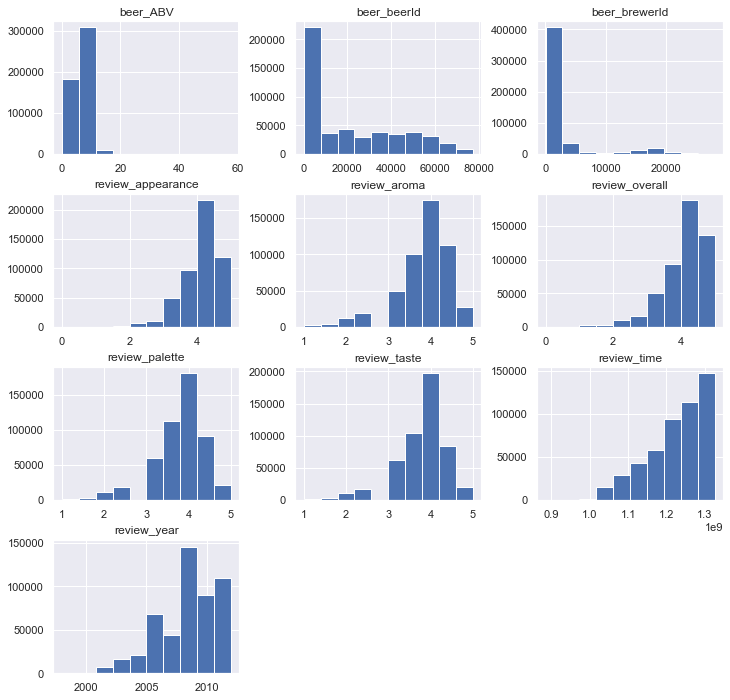

In [199]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,12))
plt.show()

In [200]:
df.corr()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time,review_year
beer_ABV,1.000000,0.217320,0.078702,0.251827,0.318706,0.118760,0.268288,0.270915,0.142641,0.144276
beer_beerId,0.217320,1.000000,0.460914,0.050835,0.060654,-0.012547,0.035680,0.014374,0.460211,0.456756
beer_brewerId,0.078702,0.460914,1.000000,-0.004555,0.017241,-0.014356,-0.002606,-0.009661,0.246254,0.242698
review_appearance,0.251827,0.050835,-0.004555,1.000000,0.544325,0.482822,0.551516,0.530783,0.046353,0.047444
review_palette,0.318706,0.060654,0.017241,0.544325,1.000000,0.597741,0.600336,0.702967,0.049932,0.050229
review_overall,0.118760,-0.012547,-0.014356,0.482822,0.597741,1.000000,0.688935,0.780247,0.018225,0.019497
review_taste,0.268288,0.035680,-0.002606,0.551516,0.600336,0.688935,1.000000,0.722357,0.043758,0.044976
review_aroma,0.270915,0.014374,-0.009661,0.530783,0.702967,0.780247,0.722357,1.000000,0.028925,0.029950
review_time,0.142641,0.460211,0.246254,0.046353,0.049932,0.018225,0.043758,0.028925,1.000000,0.992318
review_year,0.144276,0.456756,0.242698,0.047444,0.050229,0.019497,0.044976,0.029950,0.992318,1.000000


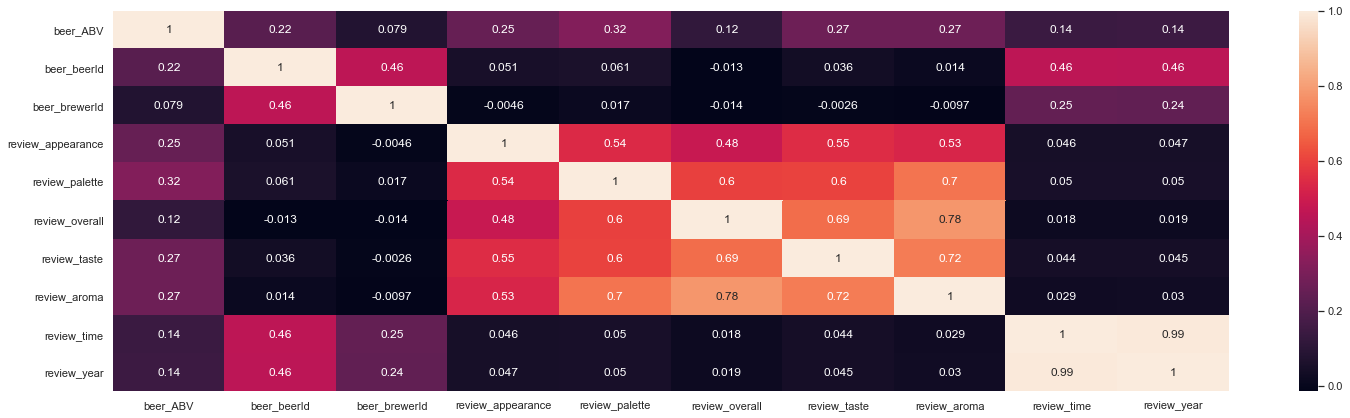

In [201]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

## Question:1 
Rank top 3 Breweries which produce the strongest beers?

In [202]:
data = df.groupby(['beer_brewerId'])['beer_ABV'].mean()
strong = pd.DataFrame(data.reset_index())

strong.columns = ['beer_brewerId','beer_abv_mean']

strongest = strong.sort_values(by=['beer_abv_mean'], ascending=False).head(3)

strongest

,beer_brewerId,beer_abv_mean
698,6513,19.228824
165,736,13.750000
1464,24215,12.466667


## Question:2 
Which year did beers enjoy the highest ratings?

In [203]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,"Served at ~15C. Gorgeous pour. Nut brown, slig...",1221003321,2008
172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,"This beer is tops. The crisp, yet smooth taste...",1129192511,2005
409699,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.0,4.0,5.0,4.5,abents,4.5,Thanks to mikereaser for sending this in a tra...,1235006981,2009
517331,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,4.5,4.5,5.0,4.5,cuzinpete00,4.5,this beer is a must try. very drinkable and ve...,1203476701,2008
172704,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,3.0,3.5,5.0,4.0,lordbrad1,5.0,I've never met anyone that didn't like this be...,1135296352,2005


In [204]:
reviews = df.groupby('beer_beerId').agg({
                                            'review_overall': np.mean,
                                            'review_aroma': np.mean,
                                            'review_appearance': np.mean,
                                            'review_palette': np.mean,     
                                            'review_taste': np.mean,
                                            'beer_ABV': np.mean
                                        })
top_reviews = pd.DataFrame(reviews.reset_index()).sort_values(['review_overall', 'review_aroma','review_appearance','review_palette','review_taste','beer_ABV'], ascending=[False,False, False, False, False, False])
highest_review = pd.merge(df[['review_year','beer_beerId']],top_reviews[:1],on='beer_beerId') 
highest_review

,review_year,beer_beerId,review_overall,review_aroma,review_appearance,review_palette,review_taste,beer_ABV
0,2002,1734,5.0,5.0,5.0,5.0,5.0,10.0


In [205]:
print("Year : ",highest_review['review_year'].to_string(index=False))

Year :   2002


## Question:3 
Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [206]:
factors = df[['review_overall','review_aroma','review_taste','review_appearance','review_palette']]
factors.head()

,review_overall,review_aroma,review_taste,review_appearance,review_palette
492945,5.0,5.0,4.5,4.5,3.0
172728,5.0,4.0,4.5,5.0,3.0
409699,5.0,4.5,4.5,4.0,4.0
517331,5.0,4.5,4.5,4.5,4.5
172704,5.0,5.0,4.0,3.0,3.5


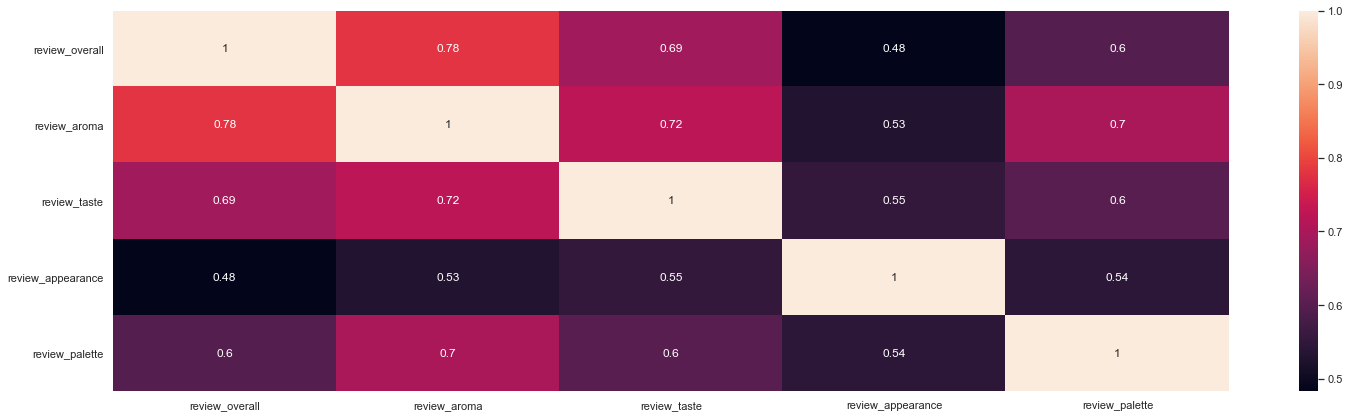

In [207]:
sns.heatmap(factors.corr(), annot=True)
plt.show()

In [208]:
features = factors.drop(["review_overall"], axis=1).columns
features

Index(['review_aroma', 'review_taste', 'review_appearance', 'review_palette'], dtype='object')

In [209]:
from sklearn.ensemble import RandomForestRegressor
rnd_clf = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(factors[features].values, factors["review_overall"].values)
feature_importance = rnd_clf.feature_importances_

In [210]:
for name, score in zip(features, feature_importance):
    print(name, score)

review_aroma 0.9248645379952832
review_taste 0.05626699791221676
review_appearance 0.010016248131058496
review_palette 0.008852215961441503


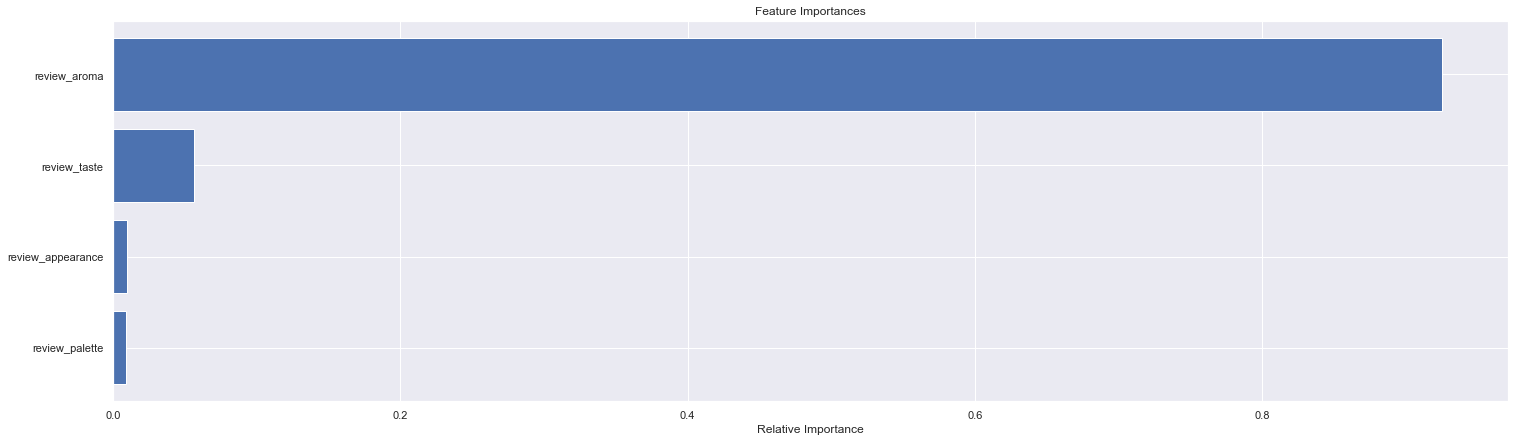

In [211]:
indices = np.argsort(feature_importance)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

## Question:4 
If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502769 entries, 492945 to 39638
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            502769 non-null  float64
 1   beer_beerId         502769 non-null  int64  
 2   beer_brewerId       502769 non-null  int64  
 3   beer_name           502769 non-null  object 
 4   beer_style          502769 non-null  object 
 5   review_appearance   502769 non-null  float64
 6   review_palette      502769 non-null  float64
 7   review_overall      502769 non-null  float64
 8   review_taste        502769 non-null  float64
 9   review_profileName  502769 non-null  object 
 10  review_aroma        502769 non-null  float64
 11  review_text         502769 non-null  object 
 12  review_time         502769 non-null  int64  
 13  review_year         502769 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 57.5+ MB


In [213]:
"""
I will pick the 3 beers based on the mean of the
1) review_overall, 
2) review_aroma, 
3) review_appearance 
4) review_palate, 
5) review_taste
6) beer_ABV
"""
reviews = df.groupby('beer_beerId').agg({
                                            'review_overall': np.mean,
                                            'review_aroma': np.mean,
                                            'review_appearance': np.mean,
                                            'review_palette': np.mean,     
                                            'review_taste': np.mean,
                                            'beer_ABV': np.mean
                                        })
recommended_beers = pd.DataFrame(reviews.reset_index()).sort_values(['review_overall', 'review_aroma','review_appearance','review_palette','review_taste','beer_ABV'], ascending=[False,False, False, False, False, False])
top_rated_beers = pd.merge(recommended_beers[:3],df[['beer_beerId','beer_name','beer_style']],on='beer_beerId') 
top_rated_beers

,beer_beerId,review_overall,review_aroma,review_appearance,review_palette,review_taste,beer_ABV,beer_name,beer_style
0,1734,5.0,5.0,5.0,5.0,5.0,10.0,Edsten Triple-Wit,Belgian Strong Pale Ale
1,29423,5.0,5.0,5.0,5.0,5.0,9.5,Old Gander Barley Wine,American Barleywine
2,45944,5.0,5.0,5.0,5.0,5.0,9.0,Rogue Black Brutal,Schwarzbier


## Question:5 
Which Beer style seems to be the favorite based on reviews written by users?

In [214]:
print("Favorite Bear Style Based on Users Review is : ",top_rated_beers['beer_style'][:1].to_string(index=False))

Favorite Bear Style Based on Users Review is :   Belgian Strong Pale Ale


In [215]:
enjoy = df[['review_overall','review_aroma','review_appearance','review_palette','review_taste','beer_ABV','beer_style']]
enjoy.head()

,review_overall,review_aroma,review_appearance,review_palette,review_taste,beer_ABV,beer_style
492945,5.0,5.0,4.5,3.0,4.5,6.2,American Brown Ale
172728,5.0,4.0,5.0,3.0,4.5,4.7,American Adjunct Lager
409699,5.0,4.5,4.0,4.0,4.5,7.5,American Amber / Red Ale
517331,5.0,4.5,4.5,4.5,4.5,5.0,Oatmeal Stout
172704,5.0,5.0,3.0,3.5,4.0,4.7,American Adjunct Lager


In [216]:
enjoy_beer1 = enjoy.groupby('beer_style').agg({
                                            'review_overall': np.mean,
                                            'review_aroma': np.mean,
                                            'review_appearance': np.mean,
                                            'review_palette': np.mean,     
                                            'review_taste': np.mean,
                                            'beer_ABV': np.mean
                                            })
enjoy_beer1 = pd.DataFrame(enjoy_beer1.reset_index())
enjoy_beer1.columns = ['beer_style','review_overall_mean','review_aroma_mean','review_appearance_mean','review_palette_mean','review_taste_mean','beer_ABV_mean']

enjoy_beer2 = enjoy.groupby('beer_style').agg({
                                            'review_overall': np.max,
                                            'review_aroma': np.max,
                                            'review_appearance': np.max,
                                            'review_palette': np.max,     
                                            'review_taste': np.max,
                                            'beer_ABV': np.max
                                            })
enjoy_beer2 = pd.DataFrame(enjoy_beer2.reset_index())
enjoy_beer2.columns = ['beer_style','review_overall_max','review_aroma_max','review_appearance_max','review_palette_max','review_taste_max','beer_ABV_max']

enjoy_beer3 = enjoy.groupby('beer_style').agg({
                                            'review_overall': np.size,
                                            'review_aroma': np.size,
                                            'review_appearance': np.size,
                                            'review_palette': np.size,     
                                            'review_taste': np.size,
                                            'beer_ABV': np.size                                        
                                            })
enjoy_beer3 = pd.DataFrame(enjoy_beer3.reset_index())
enjoy_beer3.columns = ['beer_style','review_overall_count','review_aroma_count','review_appearance_count','review_palette_count','review_taste_count','beer_ABV_count']

enjoy_beer = pd.merge(pd.merge(enjoy_beer2, enjoy_beer1, on='beer_style'),enjoy_beer3, on='beer_style')
enjoy_beer.head()

,beer_style,review_overall_max,review_aroma_max,review_appearance_max,review_palette_max,review_taste_max,beer_ABV_max,review_overall_mean,review_aroma_mean,review_appearance_mean,review_palette_mean,review_taste_mean,beer_ABV_mean,review_overall_count,review_aroma_count,review_appearance_count,review_palette_count,review_taste_count,beer_ABV_count
0,Altbier,5.0,5.0,5.0,5.0,5.0,10.0,3.880986,3.820268,3.826539,3.693273,3.776226,5.949969,3508.0,3508.0,3508.0,3508.0,3508.0,3508.0
1,American Adjunct Lager,5.0,5.0,5.0,5.0,5.0,10.0,3.136854,2.812303,2.857472,2.575337,2.834494,4.846145,8900.0,8900.0,8900.0,8900.0,8900.0,8900.0
2,American Amber / Red Ale,5.0,5.0,5.0,5.0,5.0,13.0,3.878903,3.813247,3.900779,3.754892,3.753737,6.244191,17325.0,17325.0,17325.0,17325.0,17325.0,17325.0
3,American Amber / Red Lager,5.0,5.0,5.0,5.0,5.0,7.8,3.395969,3.177741,3.375272,3.042484,3.156863,4.897894,2754.0,2754.0,2754.0,2754.0,2754.0,2754.0
4,American Barleywine,5.0,5.0,5.0,5.0,5.0,18.0,3.921748,4.089597,4.110768,4.059664,4.046242,10.305888,9872.0,9872.0,9872.0,9872.0,9872.0,9872.0


In [217]:
recomd = enjoy_beer.sort_values([
                                'review_overall_count','review_aroma_count','review_appearance_count','review_palette_count','review_taste_count','beer_ABV_count',
                                'review_overall_mean','review_aroma_mean','review_appearance_mean','review_palette_mean','review_taste_mean','beer_ABV_mean',
                                'review_overall_max','review_aroma_max','review_appearance_max','review_palette_max','review_taste_max','beer_ABV_max'
                                ], ascending=[False, False,False, False, False, False,False, False,False, False, False, False,False, False,False, False, False, False])
top = recomd[:5]['beer_style']

In [218]:
top

12                        American IPA
9       American Double / Imperial IPA
11    American Double / Imperial Stout
14             American Pale Ale (APA)
2             American Amber / Red Ale
Name: beer_style, dtype: object

## Question:6 
How does written review compare to overall review score for the beer styles?

In [220]:
reviews_all = df.groupby('beer_style').agg({
                                            'review_overall': np.mean,
                                            'review_aroma': np.mean,
                                            'review_appearance': np.mean,
                                            'review_palette': np.mean,     
                                            'review_taste': np.mean,
                                            'beer_ABV': np.mean
                                        })
review_score_beerstyle = pd.DataFrame(reviews_all.reset_index()).sort_values(['review_overall', 'review_aroma','review_appearance','review_palette','review_taste','beer_ABV'], ascending=[False,False, False, False, False, False])
review_score_beerstyle.head()

,beer_style,review_overall,review_aroma,review_appearance,review_palette,review_taste,beer_ABV
63,Gueuze,4.139513,4.192110,4.011867,4.147851,4.086915,5.146761
27,Berliner Weissbier,4.124242,3.966667,3.846970,3.840152,3.943939,4.181591
11,American Double / Imperial Stout,4.101586,4.262178,4.217562,4.235435,4.168521,10.149624
83,Oatmeal Stout,4.095110,4.114259,4.180567,3.964314,4.031255,5.803926
41,Eisbock,4.082902,4.199482,3.971503,4.069948,4.119171,12.568290


## Question:7 
How do find similar beer drinkers by using written reviews only?

In [245]:
ratings = df[['beer_beerId','review_profileName','review_overall']]
ratings.head()

,beer_beerId,review_profileName,review_overall
492945,1339,prosper,5.0
172728,689,AussieInPhilly,5.0
409699,15881,abents,5.0
517331,571,cuzinpete00,5.0
172704,689,lordbrad1,5.0


In [246]:
#checking review count for each rating
ratings['review_overall'].value_counts()

4.0    187460
4.5    106785
3.5     93270
3.0     50180
5.0     30092
2.5     17205
2.0     11047
1.5      3663
1.0      3064
0.0         3
Name: review_overall, dtype: int64

In [247]:
reviews_count_beer_id = ratings.groupby('beer_beerId')['review_overall'].count().to_frame('Reviews_count').sort_values(by = "Reviews_count", ascending=False)
reviews_count_beer_id.head()

,Reviews_count
beer_beerId,
1904,2928
276,2525
34,2477
2671,2443
11757,2443


In [248]:
reviews_count_beer_id.reset_index(inplace=True)

In [249]:
reviews_count_beer_id.head()

,beer_beerId,Reviews_count
0,1904,2928
1,276,2525
2,34,2477
3,2671,2443
4,11757,2443


In [250]:
reviews_count_analyze = reviews_count_beer_id['Reviews_count'].value_counts().to_frame().reset_index()
reviews_count_analyze.columns = ['number_of_reviews','number_of_beer_ids']
reviews_count_analyze.head()

,number_of_reviews,number_of_beer_ids
0,1,4718
1,2,2235
2,3,1269
3,4,860
4,5,628


In [251]:
#calculating percentage of each beer_id and also their cummulative percentage
reviews_count_analyze['percentage_beers'] = (reviews_count_analyze['number_of_beer_ids']*100)/reviews_count_analyze['number_of_beer_ids'].sum()
reviews_count_analyze['cumulative_percentage_beers'] = reviews_count_analyze['percentage_beers'].cumsum()
reviews_count_analyze.head()

,number_of_reviews,number_of_beer_ids,percentage_beers,cumulative_percentage_beers
0,1,4718,31.558528,31.558528
1,2,2235,14.949833,46.508361
2,3,1269,8.488294,54.996656
3,4,860,5.752508,60.749164
4,5,628,4.200669,64.949833


In [252]:
reviews_count_analyze.count()

number_of_reviews              590
number_of_beer_ids             590
percentage_beers               590
cumulative_percentage_beers    590
dtype: int64

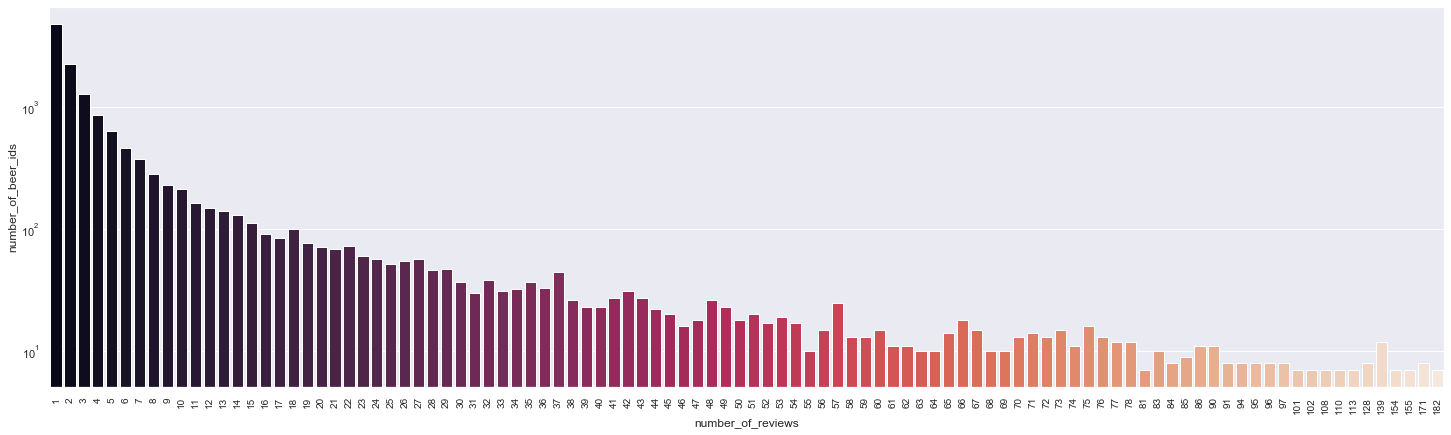

In [253]:
sns.set(rc={'figure.figsize':(25,7)})
ax = sns.barplot(x=reviews_count_analyze[0:100]['number_of_reviews'], y=reviews_count_analyze[0:200]['number_of_beer_ids'], palette="rocket")
ax.set(yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10)
ax
#There are more beerids having very less no of reviews

In [254]:
reviews_count_by_profilename = ratings.groupby('review_profileName')['review_overall'].count().to_frame('count_reviews').sort_values(by = "count_reviews", ascending = False)
reviews_count_by_profilename.reset_index(inplace=True)
reviews_count_by_profilename.head()

,review_profileName,count_reviews
0,northyorksammy,1695
1,mikesgroove,1289
2,BuckeyeNation,1195
3,Phyl21ca,1145
4,womencantsail,1108


In [255]:
reviews_count_by_profilename.count()

review_profileName    22563
count_reviews         22563
dtype: int64

In [256]:
#now lets explore number of users with number of reviews they have given
reviews_count_user = reviews_count_by_profilename['count_reviews'].value_counts().to_frame().reset_index()
reviews_count_user.columns = ['number_of_reviews','number_of_users']
reviews_count_user.head()

,number_of_reviews,number_of_users
0,1,7621
1,2,2887
2,3,1697
3,4,1144
4,5,829


In [257]:
reviews_count_user.count()

number_of_reviews    472
number_of_users      472
dtype: int64

In [258]:
reviews_count_user['percentage_users'] = (reviews_count_user['number_of_users']*100)/reviews_count_user['number_of_users'].sum()
reviews_count_user['cumul_percentage_users'] = reviews_count_user['percentage_users'].cumsum()
reviews_count_user.head()

,number_of_reviews,number_of_users,percentage_users,cumul_percentage_users
0,1,7621,33.776537,33.776537
1,2,2887,12.795284,46.571821
2,3,1697,7.521163,54.092984
3,4,1144,5.070248,59.163232
4,5,829,3.674157,62.837389


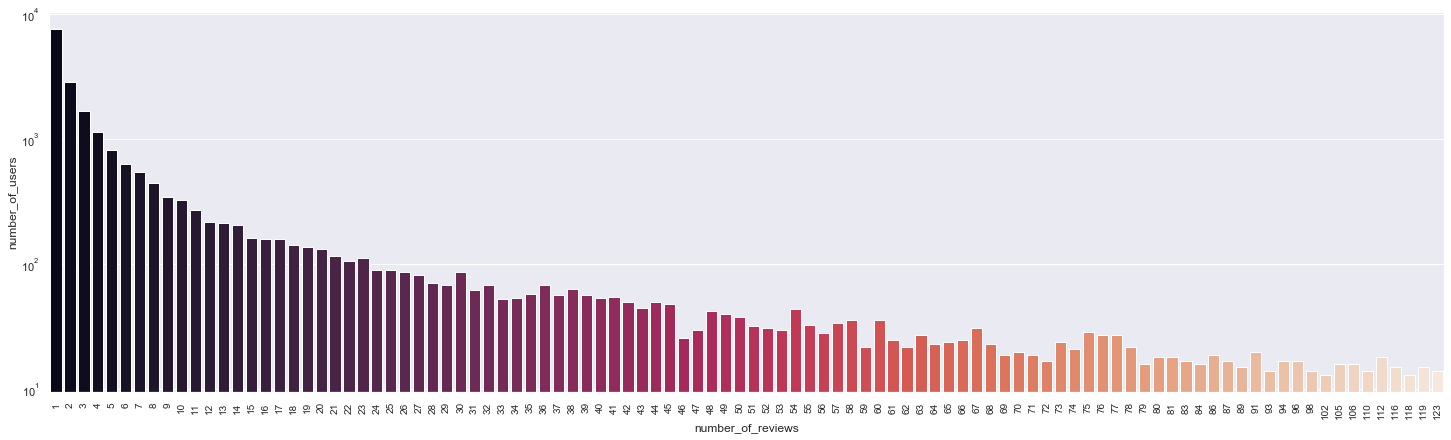

In [259]:
#visualizing number of users with number of reviews

sns.set(rc={'figure.figsize':(25,7)})
ax = sns.barplot(x=reviews_count_user[0:100]['number_of_reviews'], y=reviews_count_user[0:200]['number_of_users'], palette="rocket")
ax.set(yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10)
ax

In [266]:
# Data exploration
#unique values for each metric
print(df['beer_beerId'].nunique())
print(df['review_profileName'].nunique())
print(df['review_overall'].nunique())
print(df['beer_beerId'].count())

14950
22563
10
502769


(array([  70.,  136.,  303.,  561.,  484., 2207., 4094., 4940., 1854.,
         301.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

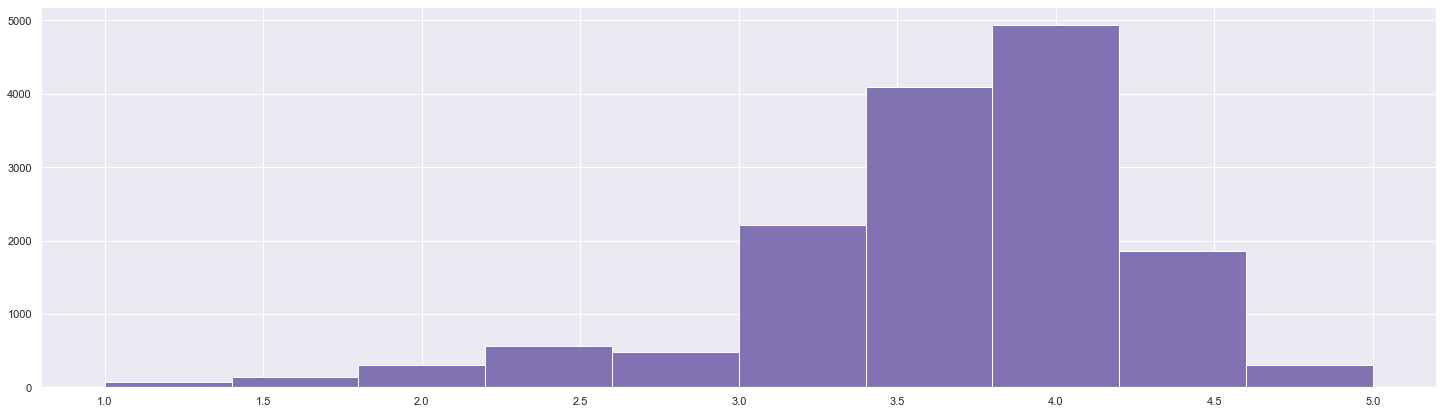

In [267]:
plt.hist(df.groupby('beer_beerId')['review_overall'].mean(), color="m")

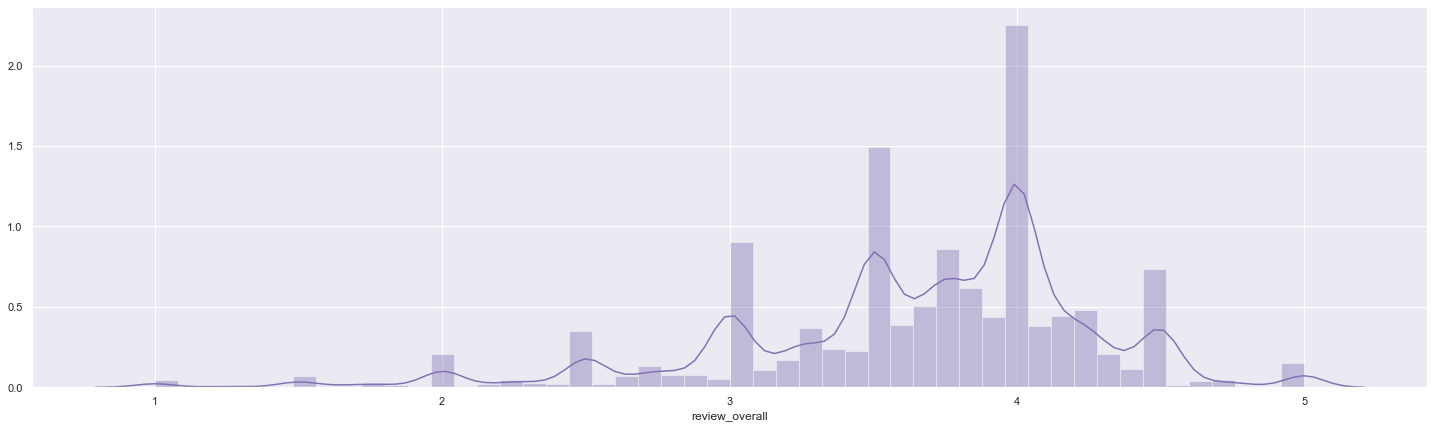

In [268]:
sns.distplot(df.groupby('beer_beerId')['review_overall'].mean(), color="m")

In [269]:
df.groupby('beer_beerId')['review_overall'].mean().mean()

3.6529873209169903

(array([ 163.,  122.,  259.,  336.,  214., 1673., 4669., 8420., 4480.,
        2227.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

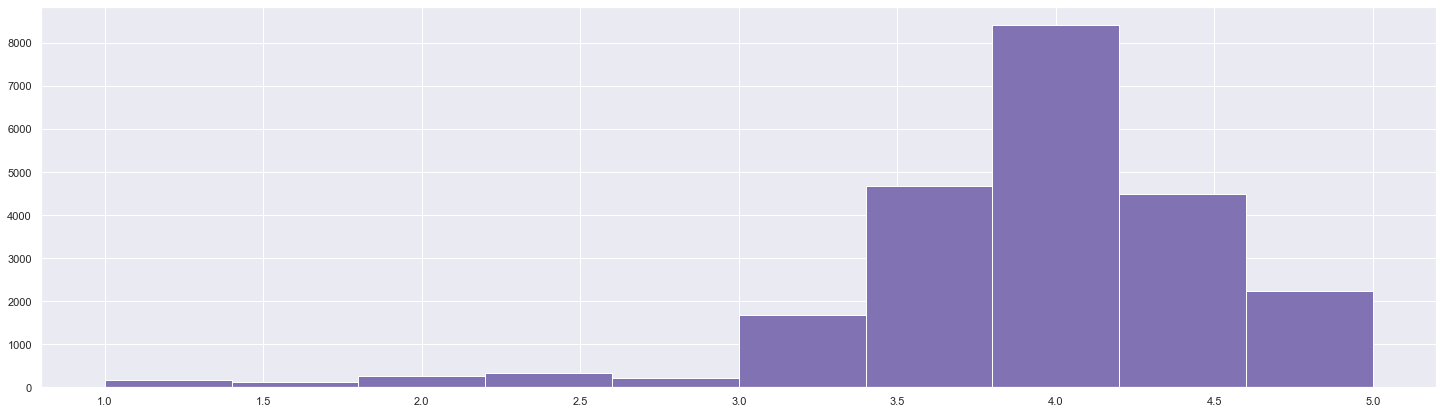

In [270]:
plt.hist(df.groupby('review_profileName')['review_overall'].mean(), color="m")

In [271]:
df.groupby('review_profileName')['review_overall'].mean().mean()

3.9382319029316686

In [272]:
reviews_count_beer_id2 = df.groupby('beer_beerId')['review_overall'].count().to_frame('Reviews_count').sort_values(by = "Reviews_count", ascending = False)
reviews_count_beer_id2.head()

,Reviews_count
beer_beerId,
1904,2928
276,2525
34,2477
2671,2443
11757,2443


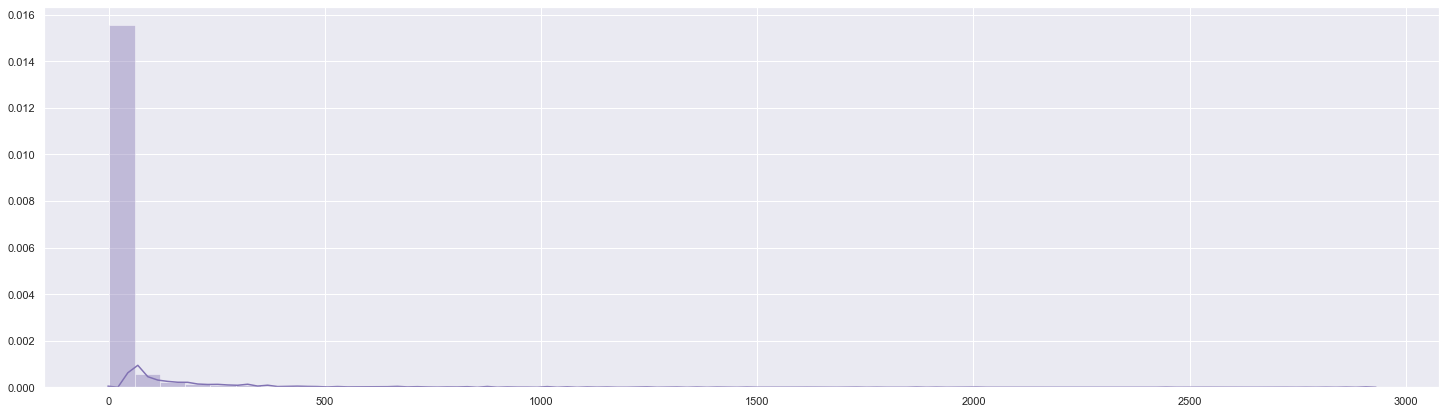

In [273]:
sns.distplot(reviews_count_beer_id2, color="m")

In [274]:
reviews_count_beer_id2['Reviews_count'].mean()

33.63003344481606

In [275]:
# The average number of ratings given by the users
review_count_user = df.groupby('review_profileName')['review_overall'].count().to_frame('Reviews_count').sort_values(by = "Reviews_count", ascending = False)
review_count_user.head()

,Reviews_count
review_profileName,
northyorksammy,1695
mikesgroove,1289
BuckeyeNation,1195
Phyl21ca,1145
womencantsail,1108


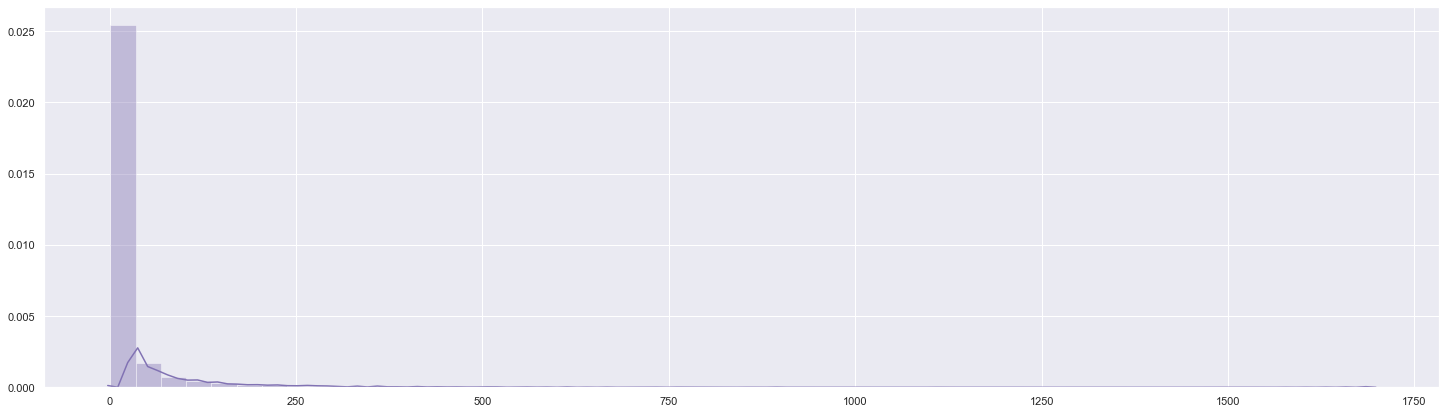

In [276]:
sns.distplot(review_count_user, color="m")

In [277]:
review_count_user['Reviews_count'].mean()

22.28289677791074

In [283]:
# Recommendation Models
import sklearn
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.30, random_state=101)

In [284]:
print(train.shape)
print(test.shape)

(351938, 3)
(150831, 3)


In [285]:
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [286]:
# pivot ratings beer features
df_beer_features = train.pivot_table(index='review_profileName',columns='beer_beerId',values='review_overall').fillna(0)
df_beer_features.head()

beer_beerId,5,6,7,8,9,11,12,13,20,30,...,77196,77199,77207,77213,77248,77295,77298,77303,77305,77310
review_profileName,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03SVTCobra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
dummy_train = train.copy()
dummy_test = test.copy()

In [288]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [289]:
# The beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot_table(
    index='review_profileName',
    columns='beer_beerId',
    values='review_overall'
).fillna(1)

# The beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot_table(
    index='review_profileName',
    columns='beer_beerId',
    values='review_overall'
).fillna(0)

In [290]:
dummy_train.head()

beer_beerId,5,6,7,8,9,11,12,13,20,30,...,77196,77199,77207,77213,77248,77295,77298,77303,77305,77310
review_profileName,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
03SVTCobra,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0tt0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [291]:
# User Similarity Matrix - Using Cosine Similarity
from sklearn.metrics.pairwise import pairwise_distances

#User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [292]:
# Finding Cosine Similarity
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [293]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [295]:
# Evaluations on test data
test_beer_features = test.pivot_table(
    index='review_profileName',
    columns='beer_beerId',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [296]:
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[ 2.14773697e+00,  3.24448346e+00,  4.26572972e+00, ...,
        -1.62369915e-03,  0.00000000e+00,  0.00000000e+00],
       [ 2.34830004e+00,  2.06805468e+00,  3.46986482e+00, ...,
        -1.37014713e-01,  1.12457962e-01,  0.00000000e+00],
       [ 8.14231228e-02,  5.69941718e-02,  3.60585968e-01, ...,
        -9.83391364e-02,  9.18215412e-02,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.09364175e+00,  4.87375377e-01,  2.01567882e+00, ...,
         5.03947275e-01,  0.00000000e+00, -5.36117912e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [297]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)
test_user_final_rating.head()

beer_beerId,5,6,7,8,9,11,12,13,20,30,...,77134,77184,77198,77202,77203,77217,77281,77297,77302,77307
review_profileName,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
03SVTCobra,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
05Harley,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,...,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [300]:
test_ = test.pivot_table(
    index='review_profileName',
    columns='beer_beerId',
    values='review_overall'
)
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.6408274927985673
